## Based on work from [Chechik et al., 1998.](https://www-mitpressjournals-org.proxy.lib.duke.edu/doi/pdf/10.1162/089976698300017124)

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
def hopfield_model_synaptic_deletion_min_val(mem, neu, tim, threshold = .5):

    import numpy as np
    import copy
    
    M = mem #number of memories
    N = neu #number of neurons
    timesteps = tim #number of timesteps for the simulation


    #creating patterns
    patterns = np.empty(shape = (M, N))
    for m in range(M):
        patterns[m] = np.random.choice([-1, 1], N)


    #creating the initial connectivity matrix based on a sum of the patterns - THIS SEEMS TO BE THE BOTTLENECK
    connectivity = np.zeros(shape = (N, N))
    for m in range(M):
        connectivity += np.outer(patterns[m], patterns[m].T)
    for i in range(N):
        connectivity[i][i] = 0
    
    Wij = connectivity / np.sqrt(M)
    z = Wij.copy()
    t = threshold
    
    ## min val deletion
    for i in range(len(z)):
        for j in range(len(z)):
            if np.abs(z[i][j]) > t:
                z[i][j] = z[i][j]
            elif z[i][j] == t:
                z[i][j] = 0
            else:
                z[i][j] = 0
    
    #set the connectivity matrix to the modified/deleted synaptic values
    Wij = z.copy()

    #want an initial overlap of 0.8
    X = np.zeros(shape = (timesteps, N))
    X[0] = patterns[0].copy()
    n_change = int(X[0].shape[0] * 0.1)
    X[0][1:n_change] = -X[0][1:n_change]
    
    
    #update the model for every timestep based on its sign
    for t in range(timesteps - 1):
        X[t+1,:] = np.sign(Wij.dot(X[t,:]))

    #create an array to hold the overlap percentages   
    m_overlap = np.empty(shape = (timesteps, M))
    mu = []

    #calculate overlap percentages
    for t in range(timesteps):
        for u in range(M):
            mu = []
            for j in range(N):
                mu = np.append(mu, patterns[u][j] * X[t][j])
            m_overlap[t][u] = ((1/N) * mu.sum())
            
    return(m_overlap.take(0, axis = 1)[1])

In [53]:
def hopfield_model_synaptic_deletion_compressed(mem, neu, tim, threshold = .5):

    import numpy as np
    import copy
    
    M = mem #number of memories
    N = neu #number of neurons
    timesteps = tim #number of timesteps for the simulation


    #creating patterns
    patterns = np.empty(shape = (M, N))
    for m in range(M):
        patterns[m] = np.random.choice([-1, 1], N)


    #creating the initial connectivity matrix based on a sum of the patterns - THIS SEEMS TO BE THE BOTTLENECK
    connectivity = np.zeros(shape = (N, N))
    for m in range(M):
        connectivity += np.outer(patterns[m], patterns[m].T)
    for i in range(N):
        connectivity[i][i] = 0
    
    Wij = connectivity / np.sqrt(M)
    z = Wij.copy()
    t = threshold
    
    ##compressed deletion
    for i in range(len(z)):
        for j in range(len(z)):
            if np.abs(z[i][j]) <= t:
                z[i][j] = 0
            elif z[i][j] > t:
                z[i][j] = z[i][j] - t
            elif z[i][j] < -t:
                z[i][j] = z[i][j] + t
    
    #set the connectivity matrix to the modified/deleted synaptic values
    Wij = z.copy()

    #want an initial overlap of 0.8
    X = np.zeros(shape = (timesteps, N))
    X[0] = patterns[0].copy()
    n_change = int(X[0].shape[0] * 0.1)
    X[0][1:n_change] = -X[0][1:n_change]
    
    
    #update the model for every timestep based on its sign
    for t in range(timesteps - 1):
        X[t+1,:] = np.sign(Wij.dot(X[t,:]))

    #create an array to hold the overlap percentages   
    m_overlap = np.empty(shape = (timesteps, M))
    mu = []

    #calculate overlap percentages
    for t in range(timesteps):
        for u in range(M):
            mu = []
            for j in range(N):
                mu = np.append(mu, patterns[u][j] * X[t][j])
            m_overlap[t][u] = ((1/N) * mu.sum())
            
    return(m_overlap.take(0, axis = 1)[1])

In [54]:
def hopfield_model_synaptic_deletion_clipping(mem, neu, tim, threshold = .5):

    import numpy as np
    import copy
    
    M = mem #number of memories
    N = neu #number of neurons
    timesteps = tim #number of timesteps for the simulation


    #creating patterns
    patterns = np.empty(shape = (M, N))
    for m in range(M):
        patterns[m] = np.random.choice([-1, 1], N)


    #creating the initial connectivity matrix based on a sum of the patterns - THIS SEEMS TO BE THE BOTTLENECK
    connectivity = np.zeros(shape = (N, N))
    for m in range(M):
        connectivity += np.outer(patterns[m], patterns[m].T)
    for i in range(N):
        connectivity[i][i] = 0
    
    Wij = connectivity / np.sqrt(M)
    z = Wij.copy()
    t = threshold
    
    ##clipping modification/deletion
    for i in range(len(z)):
        for j in range(len(z)):
            if z[i][j] > t:
                z[i][j] = 1
            elif z[i][j] < -t:
                z[i][j] = -1
            else:
                z[i][j] = 0
    
    #set the connectivity matrix to the modified/deleted synaptic values
    Wij = z.copy()

    #want an initial overlap of 0.8
    X = np.zeros(shape = (timesteps, N))
    X[0] = patterns[0].copy()
    n_change = int(X[0].shape[0] * 0.1)
    X[0][1:n_change] = -X[0][1:n_change]
    
    
    #update the model for every timestep based on its sign
    for t in range(timesteps - 1):
        X[t+1,:] = np.sign(Wij.dot(X[t,:]))

    #create an array to hold the overlap percentages   
    m_overlap = np.empty(shape = (timesteps, M))
    mu = []

    #calculate overlap percentages
    for t in range(timesteps):
        for u in range(M):
            mu = []
            for j in range(N):
                mu = np.append(mu, patterns[u][j] * X[t][j])
            m_overlap[t][u] = ((1/N) * mu.sum())
            
    return(m_overlap.take(0, axis = 1)[1])

In [55]:
%%time

del_levels = np.arange(0, 101, 1)

x = np.ones(shape = len(del_levels))
memory = np.ones(shape = len(del_levels)) * 3
i = -1
outputs = []


for lvl in del_levels:
    i = i + 1
    while x[i] > .95:
        memory[i] = memory[i] + 1
        x[i] = hopfield_model_synaptic_deletion_min_val(mem = int(memory[i]), neu = 800-lvl, tim = 2, threshold = 1)

Wall time: 4h 9min 18s


In [56]:
min_val = memory.copy()

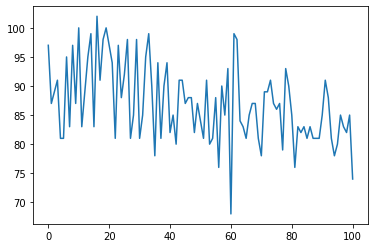

In [57]:
plt.plot(min_val);

In [58]:
%%time

del_levels = np.arange(0, 101, 1)

x = np.ones(shape = len(del_levels))
memory = np.ones(shape = len(del_levels)) * 3
i = -1
outputs = []


for lvl in del_levels:
    i = i + 1
    while x[i] > .95:
        memory[i] = memory[i] + 1
        x[i] = hopfield_model_synaptic_deletion_compressed(mem = int(memory[i]), neu = 800-lvl, tim = 2, threshold = 1)

Wall time: 3h 21min 37s


In [59]:
compressed = memory.copy()

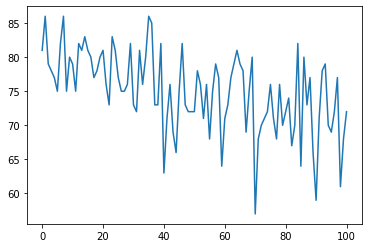

In [60]:
plt.plot(compressed);

In [61]:
%%time

del_levels = np.arange(0, 101, 1)

x = np.ones(shape = len(del_levels))
memory = np.ones(shape = len(del_levels)) * 3
i = -1
outputs = []


for lvl in del_levels:
    i = i + 1
    while x[i] > .95:
        memory[i] = memory[i] + 1
        x[i] = hopfield_model_synaptic_deletion_clipping(mem = int(memory[i]), neu = 800-lvl, tim = 2, threshold = 1)

Wall time: 2h 29min 25s


In [62]:
clipping = memory.copy()

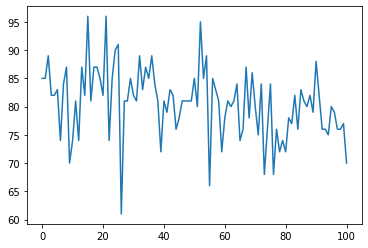

In [63]:
plt.plot(clipping);

In [64]:
min_val.mean(), compressed.mean(), clipping.mean()

(86.99009900990099, 74.97029702970298, 80.64356435643565)

In [67]:
clipping

array([85., 85., 89., 82., 82., 83., 74., 84., 87., 70., 74., 81., 74.,
       87., 82., 96., 81., 87., 87., 85., 82., 96., 74., 85., 90., 91.,
       61., 81., 81., 85., 82., 81., 89., 83., 87., 85., 89., 84., 81.,
       72., 81., 79., 83., 82., 76., 78., 81., 81., 81., 81., 85., 80.,
       95., 85., 89., 66., 85., 83., 81., 72., 78., 81., 80., 81., 84.,
       74., 76., 87., 78., 86., 80., 75., 84., 68., 76., 84., 68., 76.,
       72., 74., 72., 78., 77., 82., 76., 83., 81., 80., 82., 79., 88.,
       82., 76., 76., 75., 80., 79., 76., 76., 77., 70.])

In [74]:
df = pd.DataFrame({'min_val': min_val, 'compressed': compressed, 'clipping': clipping})
df

,min_val,compressed,clipping
0,97.0,81.0,85.0
1,87.0,86.0,85.0
2,89.0,79.0,89.0
3,91.0,78.0,82.0
4,81.0,77.0,82.0
...,...,...,...
96,85.0,72.0,79.0
97,83.0,77.0,76.0
98,82.0,61.0,76.0
99,85.0,68.0,77.0


In [90]:
binned_counts_min_val = []
c = 0
for i in range(21):
    d = c + 5
    x = np.mean(min_val[c:d])
    binned_counts_min_val = np.append(binned_counts_min_val, x)
    c = d
    
binned_counts_compressed = []
c = 0
for i in range(21):
    d = c + 5
    x = np.mean(compressed[c:d])
    binned_counts_compressed = np.append(binned_counts_compressed, x)
    c = d
    
    
binned_counts_clipping = []
c = 0
for i in range(21):
    d = c + 5
    x = np.mean(clipping[c:d])
    binned_counts_clipping = np.append(binned_counts_clipping, x)
    c = d    

In [98]:
df_bin = pd.DataFrame({'min_val_bin':binned_counts_min_val, 'compressed_bin': binned_counts_compressed, 'clipping_bin': binned_counts_clipping})

In [102]:
df_bin.to_csv('C:\\Users\\Minecraft in 4K\\binned_counts.csv')

In [103]:
df.to_csv('C:\\Users\\Minecraft in 4K\\raw_counts.csv')

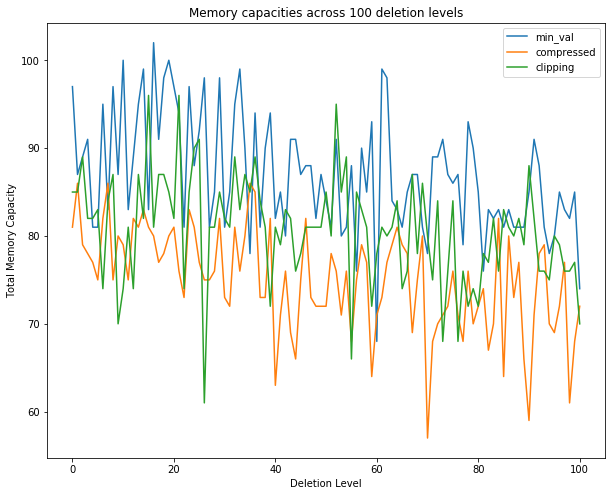

In [135]:
ax = df.plot(figsize = (10, 8), title = 'Memory capacities across 100 deletion levels')
ax.set_xlabel('Deletion Level');
ax.set_ylabel('Total Memory Capacity');

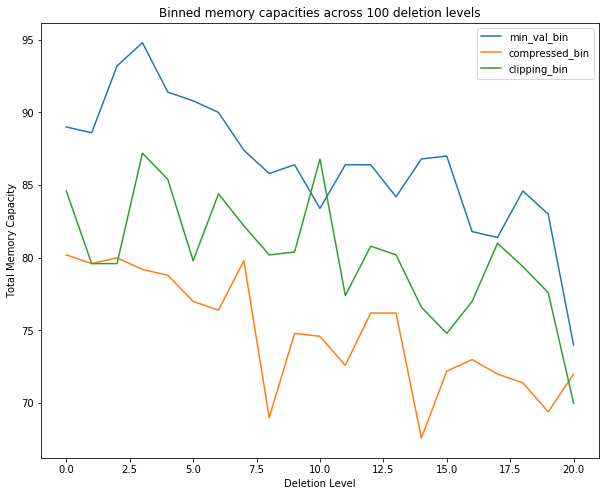

In [134]:
ax = df_bin.plot(figsize = (10, 8), title = 'Binned memory capacities across 100 deletion levels')
ax.set_xlabel('Deletion Level');
ax.set_ylabel('Total Memory Capacity');